<a href="https://colab.research.google.com/github/MuhammadUsman94/ICP5-Testing-/blob/master/ICP_5_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this example, we will be using the famous CIFAR-10 dataset. CIFAR-10 is a large image dataset containing over 60,000 images representing 10 different classes of objects like cats, planes, and cars.

The images are full-color RGB, but they are fairly small, only 32 x 32. One great thing about the CIFAR-10 dataset is that it comes prepackaged with Keras, so it is very easy to load up the dataset and the images need very little preprocessing.

We're going to be using a random seed here so that the results achieved in this ICP can be replicated by you,

LABELS 
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

In [4]:
!pip install -q tf-nightly
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
data = tf.keras.datasets.cifar10


In [8]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()


In [4]:
train_images.shape


(50000, 32, 32, 3)

In [5]:
test_images.shape


(10000, 32, 32, 3)

In [6]:
print(train_labels[0])


[6]


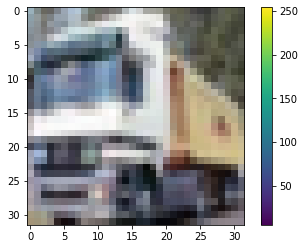

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

plt.show()

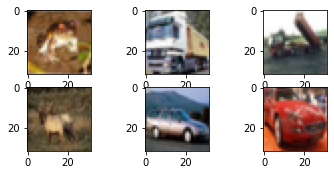

In [8]:
for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])
plt.show()

In [9]:
#Normalize

train_images, test_images = train_images / 255.0, test_images / 255.0

label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

Model With Dropout Layer with Hyperparameter 0.5

In [61]:
num_classes = 10

model = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
  layers.Conv2D(16, 3, padding='same', input_shape=(32, 32, 3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 64)         

In [64]:
#Hyper Parameters 
epochs = 20
batch_size = 64

In [65]:
history = model.fit(train_images, train_labels, epochs = epochs, batch_size = batch_size,
                    
                    validation_data=(test_images, test_labels))

Epoch 1/20
782/782 [==============================] - 56s 72ms/step - loss: 1.8088 - accuracy: 0.3348 - val_loss: 1.2673 - val_accuracy: 0.5470
Epoch 2/20
782/782 [==============================] - 56s 72ms/step - loss: 1.3059 - accuracy: 0.5303 - val_loss: 1.1179 - val_accuracy: 0.6116
Epoch 3/20
782/782 [==============================] - 57s 72ms/step - loss: 1.1577 - accuracy: 0.5898 - val_loss: 1.0257 - val_accuracy: 0.6392
Epoch 4/20
782/782 [==============================] - 57s 73ms/step - loss: 1.0617 - accuracy: 0.6223 - val_loss: 0.9781 - val_accuracy: 0.6563
Epoch 5/20
782/782 [==============================] - 57s 73ms/step - loss: 0.9938 - accuracy: 0.6498 - val_loss: 0.9274 - val_accuracy: 0.6703
Epoch 6/20
782/782 [==============================] - 56s 72ms/step - loss: 0.9361 - accuracy: 0.6677 - val_loss: 0.8708 - val_accuracy: 0.6914
Epoch 7/20
782/782 [==============================] - 56s 72ms/step - loss: 0.8937 - accuracy: 0.6838 - val_loss: 0.8265 - val_accuracy:

In [66]:
# Model evaluation
scores = model.evaluate(test_images, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.80%


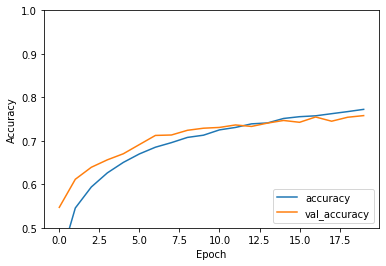

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Predict on new data

Finally, let's use our model to classify an image that wasn't included in the training or validation sets.



In [10]:
car_url = "https://cdn.pixabay.com/photo/2012/05/29/00/43/car-49278_960_720.jpg"
car_path = tf.keras.utils.get_file('car', origin=car_url)

img_car = keras.preprocessing.image.load_img(
    car_path, target_size=(32, 32)
)
img_array = keras.preprocessing.image.img_to_array(img_car)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(train_labels[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to [3] with a 100.00 percent confidence.


In [119]:
model.save("model_classification.h5")

In [5]:
from keras.models import load_model
model = load_model('model_classification.h5')